In [2]:
import sympy

In [3]:
x, m1, m2, cp1, cp2, U, A, l, T10, T2l = sympy.symbols(
    r"x \dot{m}_1 \dot{m}_2 c_p\,1 c_p\,2 U A l T_{1\,0} T_{2\,l}"
)

T1, T2, DT = sympy.symbols(r"T_1 T_2 \Delta\ T", cls=sympy.Function)

dT1 = T1(x).diff(x)
dT2 = T2(x).diff(x)
dDT = DT(x).diff(x)


We're dealing with an open system and are looking for a stationary solution. Assuming $T_2$ has its inlet at $x=l$, $T_1$ its inlet at $x=0$ and $T_2(x) > T_1(x)$ everywhere we have:

In [4]:
dx = sympy.symbols(r"\mathrm{d}x")

sympy.limit(m1*cp1*(T1(x + dx) - T1(x))/dx + m2*cp2*(T2(x - dx) - T2(x))/dx, dx, 0)

\dot{m}_1*c_p,1*Subs(Derivative(T_1(_xi_1), _xi_1), _xi_1, x) - \dot{m}_2*c_p,2*Subs(Derivative(T_2(_xi_1), _xi_1), _xi_1, x)

In [5]:
du1 = m1*cp1*dT1
du2 = m2*cp2*dT2
dq = U*(A/l)*(T2(x)-T1(x))

en_eq1 = sympy.Eq(du1, dq)
en_eq2 = sympy.Eq(-dq, du2)

display(en_eq1, en_eq2)

Eq(\dot{m}_1*c_p,1*Derivative(T_1(x), x), A*U*(-T_1(x) + T_2(x))/l)

Eq(-A*U*(-T_1(x) + T_2(x))/l, \dot{m}_2*c_p,2*Derivative(T_2(x), x))

With boundary conditions

In [6]:
bc1_eq = sympy.Eq(T1(0), T10)
bc2_eq = sympy.Eq(T2(l), T2l)
display(bc1_eq, bc2_eq)


Eq(T_1(0), T_{1,0})

Eq(T_2(l), T_{2,l})

In [21]:
T1_eq, T2_eq = sympy.dsolve(
    [en_eq1, en_eq2],
    [T1(x), T2(x)],
    ics={bc1_eq.lhs: bc1_eq.rhs, bc2_eq.lhs: bc2_eq.rhs},
)

T1_eq = T1_eq.simplify()
T2_eq = T2_eq.simplify()

display(T1_eq, T2_eq)

Eq(T_1(x), (\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)))*(\dot{m}_2*c_p,2*(T_{1,0} - T_{2,l})*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)) + (T_{1,0}*\dot{m}_1*c_p,1 + T_{2,l}*\dot{m}_2*c_p,2*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)))*exp(A*U*x*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2*l)))*exp(-A*U*x*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2*l))/(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U/(\dot{m}_2*c_p,2) + A*U/(\dot{m}_1*c_p,1)))**2)

Eq(T_2(x), (\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)))*(\dot{m}_1*c_p,1*(-T_{1,0} + T_{2,l})*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)) + (T_{1,0}*\dot{m}_1*c_p,1 + T_{2,l}*\dot{m}_2*c_p,2*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)))*exp(A*U*x*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2*l)))*exp(-A*U*x*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2*l))/(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U/(\dot{m}_2*c_p,2) + A*U/(\dot{m}_1*c_p,1)))**2)

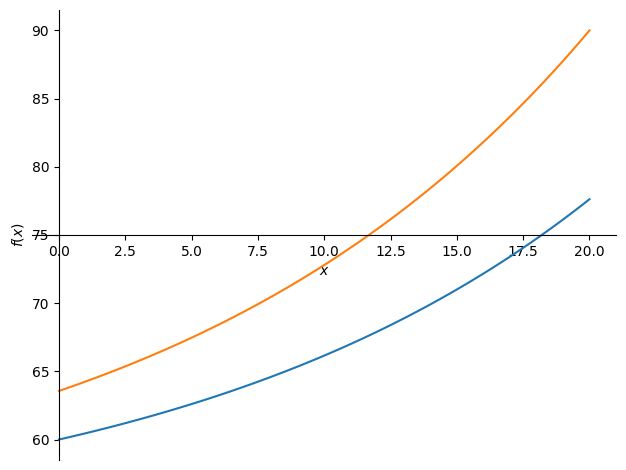

In [24]:
subs={m1: 1.5*0.16, m2: -0.16, cp1: 4184, cp2: 4184, l: 20, A: 5, U: 500, T10: 60, T2l: 90}

sympy.plot(T1_eq.rhs.subs(subs), T2_eq.rhs.subs(subs), (x, 0, subs[l]))

Solve the energy equations for $\mathrm{d}T_1$ and $\mathrm{d}T_2$, respectively:

In [6]:
dT1_sol = sympy.solve(en_eq1, dT1)[0]
dT2_sol = sympy.solve(en_eq2, dT2)[0]

dT1_eq = sympy.Eq(dT1, dT1_sol)
dT2_eq = sympy.Eq(dT2, dT2_sol)

display(dT1_eq, dT2_eq)

Eq(Derivative(T_1(x), x), A*U*(-T_1(x) + T_2(x))/(\dot{m}_1*c_p,1*l))

Eq(Derivative(T_2(x), x), A*U*(T_1(x) - T_2(x))/(\dot{m}_2*c_p,2*l))

We have $\frac{\mathrm{d} T_2}{\mathrm{d} x} - \frac{\mathrm{d} T_1}{\mathrm{d} x} = \frac{\mathrm{d}(T_2-T_1)}{\mathrm{d} x} = \frac{\mathrm{d} \Delta T}{\mathrm{d} x}$

In [7]:
dDT_sol = (dT2_sol - dT1_sol).subs({T2(x)-T1(x): DT(x)})
dDT_eq = sympy.Eq(dDT, dDT_sol)
dDT_eq

Eq(Derivative(\Delta T(x), x), -A*U*\Delta T(x)/(\dot{m}_2*c_p,2*l) - A*U*\Delta T(x)/(\dot{m}_1*c_p,1*l))

Let's solve this ODE.

In [8]:
DT_eq = sympy.dsolve(dDT_eq)
DT_eq

Eq(\Delta T(x), C1*exp(-A*U*x*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))/l))

Let's subsitute for $\Delta T$ in the energy balance equation for $T_1$:

In [9]:
dT1_eq2 = en_eq1.subs({T2(x)-T1(x): DT_eq.rhs})
dT1_eq2

Eq(\dot{m}_1*c_p,1*Derivative(T_1(x), x), A*C1*U*exp(-A*U*x*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))/l)/l)

Okay, let's solve this ODE for $T_1$ to get the general solution:

In [10]:
T1_gen_sol = sympy.dsolve(dT1_eq2)
T1_gen_sol

Eq(T_1(x), -C1*\dot{m}_2*c_p,2*exp(-A*U*x*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))/l)/(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2) + C2)

Let's substitue the general solution into the boundary condition $T_1(0) = T_{1,0}$ ...

In [11]:
cs1_eq = bc1_eq.subs({T1(0): T1_gen_sol.rhs.subs({x: 0})})
cs1_eq

Eq(-C1*\dot{m}_2*c_p,2/(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2) + C2, T_{1,0})

...and solve for $C_2$

In [12]:
C2 = sympy.symbols("C2")

cs12_sol = sympy.solve(cs1_eq, C2)[0].simplify()
cs12_eq = sympy.Eq(C2, cs12_sol)
cs12_eq

Eq(C2, (C1*\dot{m}_2*c_p,2 + T_{1,0}*\dot{m}_1*c_p,1 + T_{1,0}*\dot{m}_2*c_p,2)/(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2))

Finally, we can subsitute $C_2$ into the general solution to find the particular solution for $T_1$

In [13]:
T1_part_sol = T1_gen_sol.subs({C2: cs12_sol}).simplify()
T1_part_sol

Eq(T_1(x), (-C1*\dot{m}_2*c_p,2 + (C1*\dot{m}_2*c_p,2 + T_{1,0}*\dot{m}_1*c_p,1 + T_{1,0}*\dot{m}_2*c_p,2)*exp(A*U*x*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2*l)))*exp(-A*U*x*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2*l))/(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2))

Furthermore we have $\Delta T(l) = T_2(l) - T_1(l)$. We can use that to solve for $C_1$.

In [14]:
C1_eq = sympy.Eq(DT_eq.rhs.subs({x: l}), T2l - T1_part_sol.rhs.subs({x: l}))
display(C1_eq)

C1 = sympy.symbols("C1")

C1_sol = sympy.solve(C1_eq, C1)[0].simplify()
C1_sol

Eq(C1*exp(-A*U*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))), T_{2,l} - (-C1*\dot{m}_2*c_p,2 + (C1*\dot{m}_2*c_p,2 + T_{1,0}*\dot{m}_1*c_p,1 + T_{1,0}*\dot{m}_2*c_p,2)*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)))*exp(-A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2))/(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2))

(-T_{1,0}*\dot{m}_1*c_p,1 - T_{1,0}*\dot{m}_2*c_p,2 + T_{2,l}*\dot{m}_1*c_p,1 + T_{2,l}*\dot{m}_2*c_p,2)*exp(A*U/(\dot{m}_2*c_p,2) + A*U/(\dot{m}_1*c_p,1))/(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U/(\dot{m}_2*c_p,2) + A*U/(\dot{m}_1*c_p,1)))

In [15]:
T1_part_sol2 = T1_part_sol.subs({C1: C1_sol}).simplify()
T1_part_sol2

Eq(T_1(x), (T_{1,0}*\dot{m}_1*c_p,1*exp(A*U*x*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))/l) + T_{1,0}*\dot{m}_2*c_p,2*exp(A*U*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))) - T_{2,l}*\dot{m}_2*c_p,2*exp(A*U*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))) + T_{2,l}*\dot{m}_2*c_p,2*exp(A*U*(1/(\dot{m}_2*c_p,2) + x/(\dot{m}_2*c_p,2*l) + 1/(\dot{m}_1*c_p,1) + x/(\dot{m}_1*c_p,1*l))))*exp(-A*U*x*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))/l)/(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U/(\dot{m}_2*c_p,2) + A*U/(\dot{m}_1*c_p,1))))

Let's do all of that again in one go for $T_2$:

In [16]:
dT2_eq2 = en_eq2.subs({T2(x)-T1(x): DT_eq.rhs})

T2_gen_sol = sympy.dsolve(dT2_eq2)

cs2_eq = bc2_eq.subs({T2(l): T2_gen_sol.rhs.subs({x: l})})

cs22_sol = sympy.solve(cs2_eq, C2)[0]

T2_part_sol = T2_gen_sol.subs({C2: cs22_sol}).subs({C1: C1_sol}).simplify()
T2_part_sol

Eq(T_2(x), (-T_{1,0}*\dot{m}_1*c_p,1*exp(A*U*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))) + T_{1,0}*\dot{m}_1*c_p,1*exp(A*U*x*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))/l) + T_{2,l}*\dot{m}_1*c_p,1*exp(A*U*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))) + T_{2,l}*\dot{m}_2*c_p,2*exp(A*U*(1/(\dot{m}_2*c_p,2) + x/(\dot{m}_2*c_p,2*l) + 1/(\dot{m}_1*c_p,1) + x/(\dot{m}_1*c_p,1*l))))*exp(-A*U*x*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))/l)/(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U/(\dot{m}_2*c_p,2) + A*U/(\dot{m}_1*c_p,1))))

So, we have:

In [17]:
display(T1_part_sol2, T2_part_sol)

Eq(T_1(x), (T_{1,0}*\dot{m}_1*c_p,1*exp(A*U*x*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))/l) + T_{1,0}*\dot{m}_2*c_p,2*exp(A*U*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))) - T_{2,l}*\dot{m}_2*c_p,2*exp(A*U*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))) + T_{2,l}*\dot{m}_2*c_p,2*exp(A*U*(1/(\dot{m}_2*c_p,2) + x/(\dot{m}_2*c_p,2*l) + 1/(\dot{m}_1*c_p,1) + x/(\dot{m}_1*c_p,1*l))))*exp(-A*U*x*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))/l)/(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U/(\dot{m}_2*c_p,2) + A*U/(\dot{m}_1*c_p,1))))

Eq(T_2(x), (-T_{1,0}*\dot{m}_1*c_p,1*exp(A*U*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))) + T_{1,0}*\dot{m}_1*c_p,1*exp(A*U*x*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))/l) + T_{2,l}*\dot{m}_1*c_p,1*exp(A*U*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))) + T_{2,l}*\dot{m}_2*c_p,2*exp(A*U*(1/(\dot{m}_2*c_p,2) + x/(\dot{m}_2*c_p,2*l) + 1/(\dot{m}_1*c_p,1) + x/(\dot{m}_1*c_p,1*l))))*exp(-A*U*x*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))/l)/(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U/(\dot{m}_2*c_p,2) + A*U/(\dot{m}_1*c_p,1))))

Let's assume a flow velocity of 0.5m per second and a pipe radius of 0.01m. Then we have a mass flow (for water with a density of 998kg/m3) of

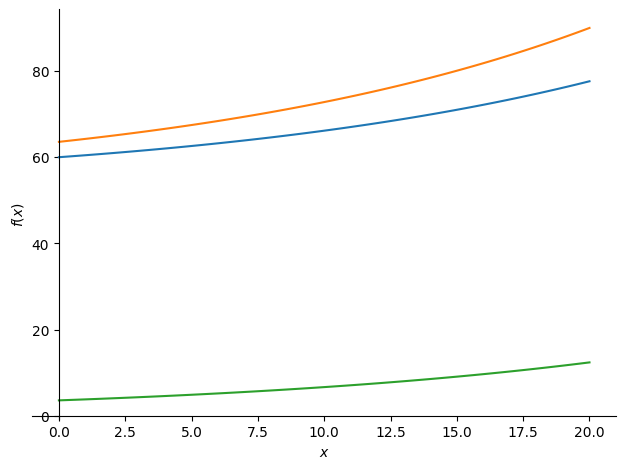

In [32]:
sympy.plot(
    T1_part_sol2.rhs.subs(subs),
    T2_part_sol.rhs.subs(subs),
    DT_eq.rhs.subs({C1: C1_sol}).subs(subs),
    (x, 0, subs[l]),
    legend=False,
)

In [39]:
display(subs[T10], T1_part_sol2.rhs.subs(subs).evalf(subs={x: 20}))
display(subs[T2l], T2_part_sol.rhs.subs(subs).evalf(subs={x: 0}))

60

77.6238410244386

90

63.5642384633421

In [40]:
display(subs[T10], T1_part_sol2.rhs.subs(subs | {m2: 0.16}).evalf(subs={x: 20}))
display(subs[T2l], T2_part_sol.rhs.subs(subs | {m2: 0.16}).evalf(subs={x: 0}))

60

89.8518584180783

90

134.777787627117

In [27]:
sympy.integrate(DT_eq.rhs.subs({C1: C1_sol})*A*U, (x, 0, l)).simplify()

Piecewise((\dot{m}_1*\dot{m}_2*c_p,1*c_p,2*l*(-T_{1,0}*exp(A*U/(\dot{m}_2*c_p,2) + A*U/(\dot{m}_1*c_p,1)) + T_{1,0} + T_{2,l}*exp(A*U/(\dot{m}_2*c_p,2) + A*U/(\dot{m}_1*c_p,1)) - T_{2,l})/(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U/(\dot{m}_2*c_p,2) + A*U/(\dot{m}_1*c_p,1))), Ne(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))), 0)), (A*U*l*(-T_{1,0}*\dot{m}_1*c_p,1 - T_{1,0}*\dot{m}_2*c_p,2 + T_{2,l}*\dot{m}_1*c_p,1 + T_{2,l}*\dot{m}_2*c_p,2)*exp(A*U/(\dot{m}_2*c_p,2) + A*U/(\dot{m}_1*c_p,1))/(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U/(\dot{m}_2*c_p,2) + A*U/(\dot{m}_1*c_p,1))), True))

Now we can answer the question of interest. How much do the output temperatures change, if we double the mass flow of the colder fluid?

In [183]:
T1l_sol = T1_part_sol2.rhs.subs({x: l})
T20_sol = T2_part_sol.rhs.subs({x: 0})

T1l, T20 = sympy.symbols(r"T_{1\,l} T_{2\,0}")

T1l_eq = sympy.Eq(T1l, T1l_sol)
T20_eq = sympy.Eq(T20, T20_sol)

display(T1l_eq, T20_eq)

Eq(T_{1,l}, (T_{1,0}*\dot{m}_1*c_p,1*exp(A*U*(1/(\dot{m}_2*c_p,2) - 1/(\dot{m}_1*c_p,1))) - T_{1,0}*\dot{m}_2*c_p,2*exp(A*U*(1/(\dot{m}_2*c_p,2) - 1/(\dot{m}_1*c_p,1))) + T_{2,l}*\dot{m}_2*c_p,2*exp(A*U*(1/(\dot{m}_2*c_p,2) - 1/(\dot{m}_1*c_p,1))) - T_{2,l}*\dot{m}_2*c_p,2)/(\dot{m}_1*c_p,1*exp(A*U/(\dot{m}_2*c_p,2) - A*U/(\dot{m}_1*c_p,1)) - \dot{m}_2*c_p,2))

Eq(T_{2,0}, (T_{1,0}*\dot{m}_1*c_p,1*exp(A*U*(1/(\dot{m}_2*c_p,2) - 1/(\dot{m}_1*c_p,1))) - T_{1,0}*\dot{m}_1*c_p,1 + T_{2,l}*\dot{m}_1*c_p,1 - T_{2,l}*\dot{m}_2*c_p,2)/(\dot{m}_1*c_p,1*exp(A*U/(\dot{m}_2*c_p,2) - A*U/(\dot{m}_1*c_p,1)) - \dot{m}_2*c_p,2))

In [184]:
# The multiplication factor for m1
f = sympy.symbols("f")

T1lp_sol = T1l_sol.subs({m1: f*m1})
T20p_sol = T20_sol.subs({m1: f*m1})

T1lp, T20p = sympy.symbols(r"T_{1\,l}^\prime T_{2\,0}^\prime")

T1lp_eq = sympy.Eq(T1lp, T1lp_sol)
T20p_eq = sympy.Eq(T20p, T20p_sol)

display(T1lp_eq, T20p_eq)

Eq(T_{1,l}^\prime, (T_{1,0}*\dot{m}_1*c_p,1*f*exp(A*U*(1/(\dot{m}_2*c_p,2) - 1/(\dot{m}_1*c_p,1*f))) - T_{1,0}*\dot{m}_2*c_p,2*exp(A*U*(1/(\dot{m}_2*c_p,2) - 1/(\dot{m}_1*c_p,1*f))) + T_{2,l}*\dot{m}_2*c_p,2*exp(A*U*(1/(\dot{m}_2*c_p,2) - 1/(\dot{m}_1*c_p,1*f))) - T_{2,l}*\dot{m}_2*c_p,2)/(\dot{m}_1*c_p,1*f*exp(A*U/(\dot{m}_2*c_p,2) - A*U/(\dot{m}_1*c_p,1*f)) - \dot{m}_2*c_p,2))

Eq(T_{2,0}^\prime, (T_{1,0}*\dot{m}_1*c_p,1*f*exp(A*U*(1/(\dot{m}_2*c_p,2) - 1/(\dot{m}_1*c_p,1*f))) - T_{1,0}*\dot{m}_1*c_p,1*f + T_{2,l}*\dot{m}_1*c_p,1*f - T_{2,l}*\dot{m}_2*c_p,2)/(\dot{m}_1*c_p,1*f*exp(A*U/(\dot{m}_2*c_p,2) - A*U/(\dot{m}_1*c_p,1*f)) - \dot{m}_2*c_p,2))

In [185]:
T1lp_ones_sol = T1lp_sol.subs(subs)
T20p_ones_sol = T20p_sol.subs(subs)

T1lp_ones_eq = sympy.Eq(T1lp, T1lp_ones_sol)
T20p_ones_eq = sympy.Eq(T20p, T20p_ones_sol)

display(T1lp_ones_eq, T20p_ones_eq)

Eq(T_{1,l}^\prime, (84853.2463653586*f*exp(-1.49229355730312/f) - 120499.2 + 84768.4778874711*exp(-1.49229355730312/f))/(1414.22077275598*f*exp(-1.49229355730312/f) - 1338.88))

Eq(T_{2,0}^\prime, (20103.2832*f + 84853.2463653586*f*exp(-1.49229355730312/f) - 120499.2)/(1414.22077275598*f*exp(-1.49229355730312/f) - 1338.88))

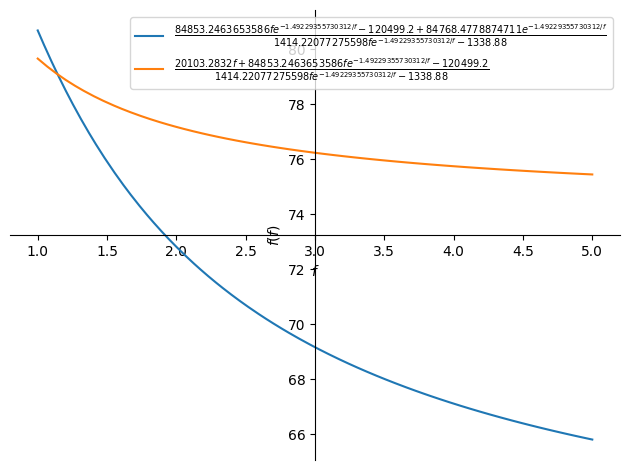

In [186]:
sympy.plot(T1lp_ones_sol, T20p_ones_sol, (f, 1, 5), legend=True)